In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

In [106]:
metrics = [
  "Memory used",
  "Program time",
  "Bind time",
  "Check time",
  "Emit time",
  "Total time",
]

def read_diagnose_file(p: str):
  df = pd.DataFrame(columns=metrics)
  
  with open(p) as f:
    lines = f.readlines()
    for line in lines:

      header = line.split(":")[0].strip()
      value = line.split(":")[1].strip()

      if(header in metrics):
        df.loc[0, header] = int(re.sub("\D", "", value))
  
  [schema, name, extension] = p.split(".")

  name = "-".join(name.split("-")[0:-1])

  df.loc[0, "Type"] = os.path.basename(schema)
  df.loc[0, "Name"] = os.path.basename(name)
  df.loc[0, "Path"] = os.path.basename(p)
  return df


def list_benchmark_files():
  cwd = os.getcwd()
  rootPath = os.path.dirname(os.path.dirname(cwd))
  benchmarkPath = os.path.join(rootPath, "data/__benchmark__/")
  files = os.listdir(benchmarkPath)
  filePaths = [benchmarkPath + file for file in files]
  return filePaths

def build_pandas_dataframe():
  df = pd.DataFrame(columns=metrics)
  for file in list_benchmark_files():
    df = pd.concat([df, read_diagnose_file(file)], ignore_index=True)
  return df

cwd = os.getcwd()
rootPath = os.path.dirname(os.path.dirname(cwd))
df = build_pandas_dataframe()
names = df["Name"].unique()
types = df["Type"].unique()

if not os.path.exists("__assets__"):
  os.makedirs("__assets__")

print(df)
print(names)
print(types)

    Memory used Program time Bind time Check time Emit time Total time  \
0         96932           72        27         18         0        117   
1        161858           81        32         35         0        147   
2         95957           65        24         10         0         99   
3        108678           53        22         25         0         99   
4        104501           63        20         24         0        106   
..          ...          ...       ...        ...       ...        ...   
135      113982           64        22          7         0         94   
136       97334           61        22         21         0        105   
137      114076           61        24          7         0         93   
138       87203           60        24          5         0         89   
139      153304           94        32         26         0        152   

           Type         Name                          Path  
0       valibot     1-simple        valibot.1-simp

In [108]:
dest = "__assets__/total_time.png"
df_type_name = df.groupby(["Type", "Name"])
# x = df_type_name.groupby(["Type"])
for name in names:
  df_name = df.groupby(["Name"])
  print(df_name)

# [["Total time"]].mean().sort_values("Total time").plot(kind="barh").get_figure()
# fig.savefig(dest)
# plt.ylabel("Type")
# plt.xlabel("Total time")
# plt.show()

    Memory used Program time Bind time Check time Emit time Total time  \
0         96932           72        27         18         0        117   
2         95957           65        24         10         0         99   
3        108678           53        22         25         0         99   
6         87881           47        18          3         0         69   
7         87835           49        17          3         0         70   
10        96645           91        24         11         0        126   
11        97073           81        31         17         0        129   
12        97198           73        31         18         0        122   
14        94277           60        21         10         0         92   
15       108481           52        17         25         0         94   
17        87809           57        20          5         0         82   
20       108570           50        17         24         0         91   
21        94115           62        22

/var/folders/p2/_sttnpb13f9f21bnkzrgyzn80000gn/T/ipykernel_72808/3225034252.py:5: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_name = df.groupby(["Name"]).get_group(name)
/var/folders/p2/_sttnpb13f9f21bnkzrgyzn80000gn/T/ipykernel_72808/3225034252.py:5: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_name = df.groupby(["Name"]).get_group(name)
/var/folders/p2/_sttnpb13f9f21bnkzrgyzn80000gn/T/ipykernel_72808/3225034252.py:5: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df_name = df.groupby(["Name"]).get_group(name)
/var/folders/p2/

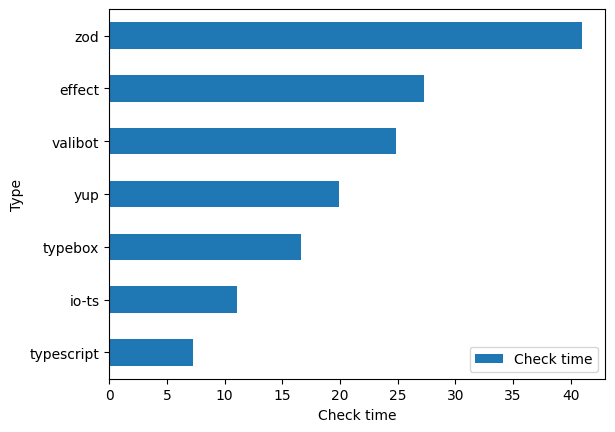

In [99]:
fig = df.groupby("Type")[["Check time"]].mean().sort_values("Check time").plot(kind="barh").get_figure()
fig.savefig(dest)
plt.ylabel("Type")
plt.xlabel("Check time")
plt.show()